## Load Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Feature Selection
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV

# Classification Models
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import auc, accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Regression Models
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Association Rule
from apyori import apriori

# Clustering Model
from sklearn.cluster import KMeans 

import warnings
warnings.filterwarnings("ignore")

## Import data

In [ ]:
df = pd.read_csv('LaundryData.csv')

##  EXPLORATORY DATA ANALYSIS

### Data Understanding

In [ ]:
df = df.drop(columns=['No'])
df.head().append(df.tail())

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles
0,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no
1,19/10/2015,20:28:42,indian,male,thin,32.0,no,no_kids,big,green,casual,white,short_sleeve,blue_jeans,long,clothes,6,9,no
2,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,casual,red,short_sleeve,black,long,clothes,4,10,no
3,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,NaN,black,casual,black,short_sleeve,yellow,short,clothes,5,9,no
4,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,casual,blue,short_sleeve,white,long,clothes,3,9,no
802,09/12/2015,20:05:46,malay,female,moderate,45.0,no,no_kids,small,white,casual,red,long sleeve,black,long,clothes,3,10,no
803,09/12/2015,20:33:01,malay,male,fat,34.0,no,no_kids,big,grey,casual,white,short_sleeve,black,long,blankets,3,7,no
804,09/12/2015,20:37:01,malay,female,moderate,53.0,no,no_kids,big,purple,traditional,pink,long sleeve,pink,long,clothes,3,7,yes
805,09/12/2015,20:42:57,indian,female,moderate,37.0,no,no_kids,big,green,traditional,brown,short_sleeve,black,long,clothes,6,10,no
806,09/12/2015,20:43:20,malay,male,moderate,29.0,no,no_kids,big,blue,casual,white,short_sleeve,black,long,blankets,4,8,no


In [ ]:
df.describe(include='all')

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles
count,807,807,797,793,790,799.000000,794,777,801,798,776,798,770,802,798,784,807.000000,807.000000,807
unique,24,512,4,2,3,NaN,2,4,2,11,3,11,2,12,2,2,NaN,NaN,2
top,29/11/2015,4:03:48,indian,female,fat,NaN,no,no_kids,big,white,casual,white,short_sleeve,black,long,clothes,NaN,NaN,no
freq,134,12,242,400,274,NaN,618,603,740,225,614,191,608,316,550,629,NaN,NaN,656
mean,NaN,NaN,NaN,NaN,NaN,42.182728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.465923,8.418835,NaN
std,NaN,NaN,NaN,NaN,NaN,7.981756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.152628,1.142694,NaN
min,NaN,NaN,NaN,NaN,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,7.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,7.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,8.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,9.000000,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           807 non-null    object 
 1   Time           807 non-null    object 
 2   Race           797 non-null    object 
 3   Gender         793 non-null    object 
 4   Body_Size      790 non-null    object 
 5   Age_Range      799 non-null    float64
 6   With_Kids      794 non-null    object 
 7   Kids_Category  777 non-null    object 
 8   Basket_Size    801 non-null    object 
 9   Basket_colour  798 non-null    object 
 10  Attire         776 non-null    object 
 11  Shirt_Colour   798 non-null    object 
 12  shirt_type     770 non-null    object 
 13  Pants_Colour   802 non-null    object 
 14  pants_type     798 non-null    object 
 15  Wash_Item      784 non-null    object 
 16  Washer_No      807 non-null    int64  
 17  Dryer_No       807 non-null    int64  
 18  Spectacles

### Data Perception

In [ ]:
print(df.isnull().sum())

Date              0
Time              0
Race             10
Gender           14
Body_Size        17
Age_Range         8
With_Kids        13
Kids_Category    30
Basket_Size       6
Basket_colour     9
Attire           31
Shirt_Colour      9
shirt_type       37
Pants_Colour      5
pants_type        9
Wash_Item        23
Washer_No         0
Dryer_No          0
Spectacles        0
dtype: int64


In [ ]:
# fill nan
fill_dict = df.mode().to_dict(orient='records')[0]
df = df.fillna(value=fill_dict)

<AxesSubplot:>

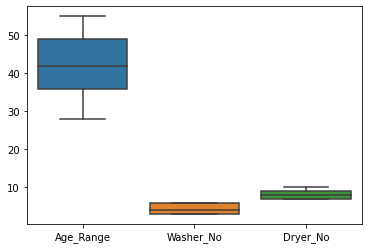

In [ ]:
# check outlier
sns.boxplot(data=df)

### Exploration of Numerical Features 

In [ ]:
# Label Encoding
df1 = df.apply(LabelEncoder().fit_transform)
df1

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles
0,7,283,3,1,1,0,1,3,0,8,0,1,1,0,1,1,0,3,0
1,7,288,2,1,2,4,0,1,0,3,0,9,1,2,0,1,3,2,0
2,7,307,3,0,1,2,0,1,0,1,0,8,1,0,0,1,1,3,0
3,7,331,2,1,2,23,0,1,0,0,0,0,1,11,1,1,2,2,0
4,7,336,2,1,1,6,0,1,0,1,0,1,1,10,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,5,272,3,0,1,17,0,1,1,9,0,8,0,0,0,1,0,3,0
803,5,292,3,1,0,6,0,1,0,4,0,9,1,0,0,0,0,0,0
804,5,293,3,0,1,25,0,1,0,7,2,6,0,7,0,1,0,0,1
805,5,296,2,0,1,9,0,1,0,3,2,2,1,0,0,1,3,3,0


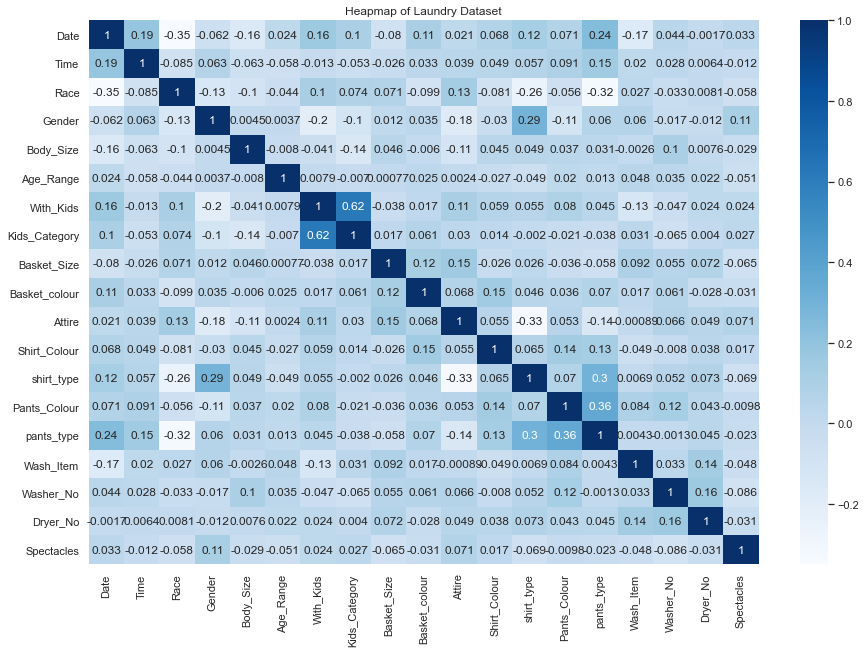

In [ ]:
# check correlation
sns.set(rc={'figure.figsize':(15,10)})
matrix = df1.corr()
sns.heatmap(data=matrix,annot=True,cmap='Blues').set(title='Heapmap of Laundry Dataset')

### Question: Which Washer_no and Dryer_no is more popular among the customers?

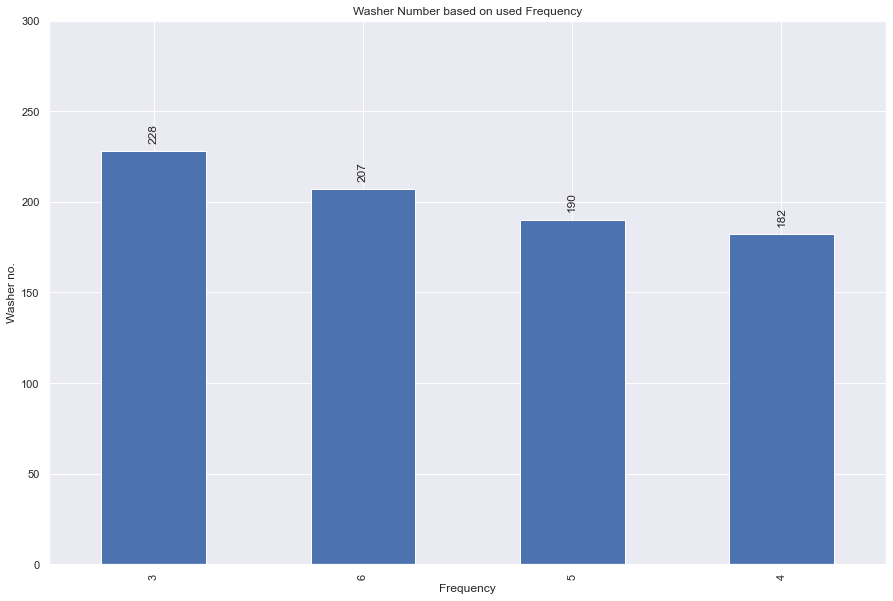

In [ ]:
a = df['Washer_No'].value_counts().plot(kind="bar")
a.set_title('Washer Number based on used Frequency')
a.set_ylabel('Washer no.')
a.set_xlabel('Frequency')
a.set(ylim=(0, 300))

for p in a.patches:
    a.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', rotation=90, xytext=(0, 18), textcoords='offset points')

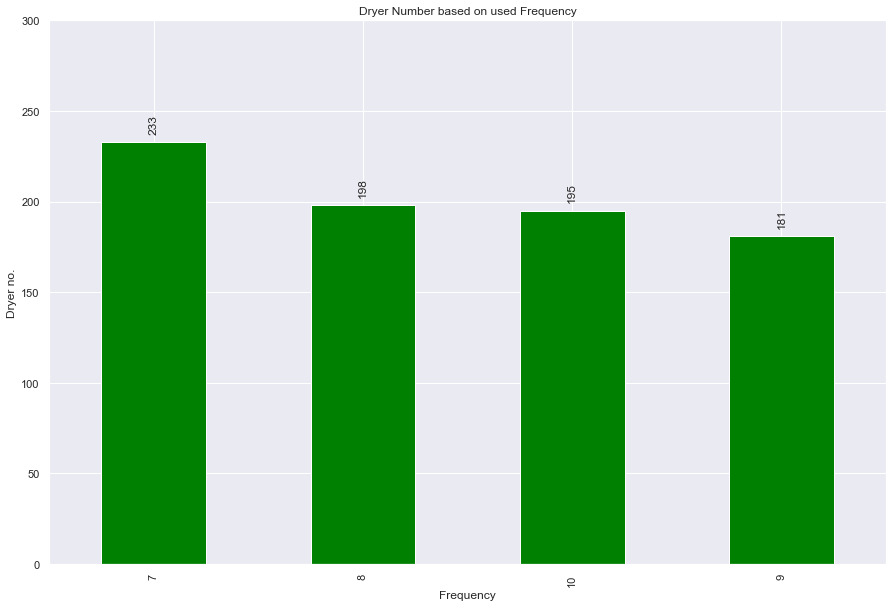

In [ ]:
b = df['Dryer_No'].value_counts().plot(kind="bar", color='green')
b.set_title('Dryer Number based on used Frequency')
b.set_ylabel('Dryer no.')
b.set_xlabel('Frequency')
b.set(ylim=(0, 300))

for p in b.patches:
    b.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', rotation=90, xytext=(0, 18), textcoords='offset points')
    


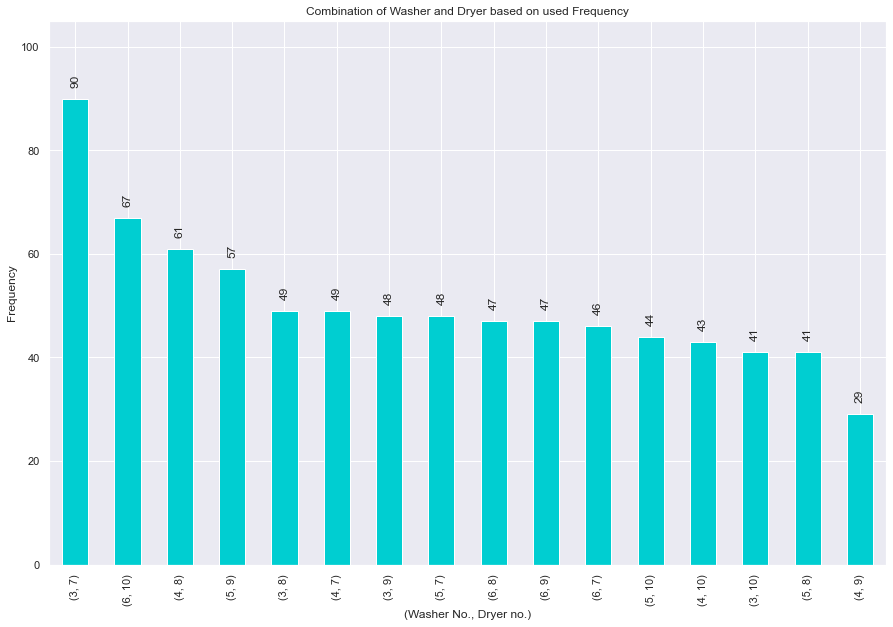

In [ ]:
rep = df.copy()
attributes = ['Washer_No', 'Dryer_No']
c_df = rep[attributes]
c = c_df.value_counts().plot(kind='bar', color='darkturquoise')

c.set_title('Combination of Washer and Dryer based on used Frequency')
c.set_xlabel('(Washer No., Dryer no.)')
c.set_ylabel('Frequency')
c.set(ylim=(0, 105))

for p in c.patches:
    c.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', rotation=90, xytext=(0, 18), textcoords='offset points')


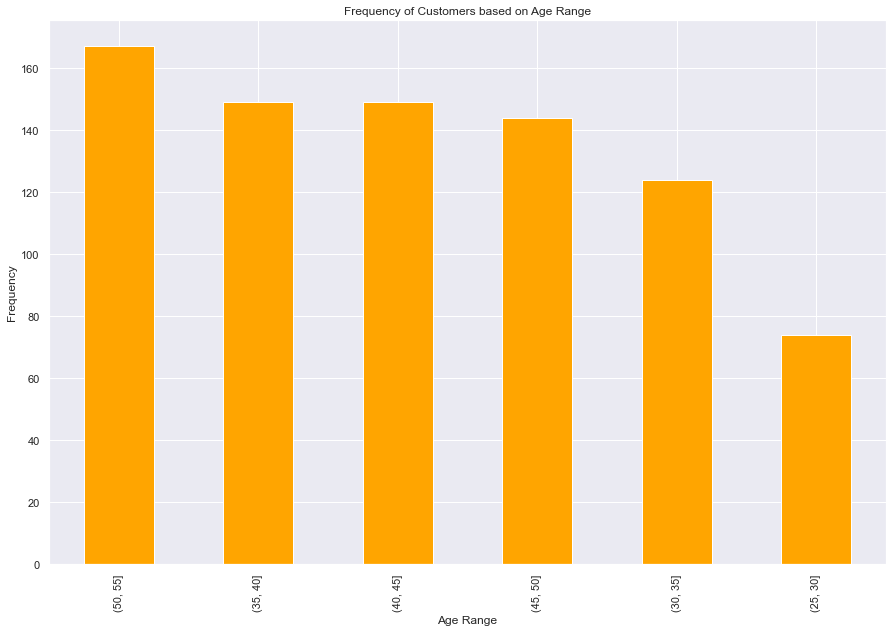

In [ ]:
bins=[25,30,35,40,45,50,55]
d = rep['Age_Range'] = pd.cut(df['Age_Range'], bins=bins)
d = rep['Age_Range'].value_counts().plot(kind="bar", color='orange')
d.set_title('Frequency of Customers based on Age Range')
d.set_xlabel('Age Range')
d.set_ylabel('Frequency')

- As we can tell from the bar charts above, the most frequently used washer is no.3 and most frequently used dryer is no. 7. 
- On top of that, the combination of the washer no.3 and dryer no.7 is most frequently used by the customers. 

## Feature Selection

### Boruta

In [ ]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [ ]:
# Label encode the categorical data first.
boruta = df1.copy()

non_features = [] # if we want to remove a feature
boruta = boruta.drop(non_features, axis=1)

# Define the dependent variable that needs to be predicted.
target = 'Gender'
y = boruta.Washer_No # target variable
X = boruta.drop(target, 1) # data

print(y)
print()
print(X.head())

0      0
1      3
2      1
3      2
4      0
      ..
802    0
803    0
804    0
805    3
806    1
Name: Washer_No, Length: 807, dtype: int64

   Date  Time  Race  Body_Size  Age_Range  With_Kids  Kids_Category  \
0     7   283     3          1          0          1              3   
1     7   288     2          2          4          0              1   
2     7   307     3          1          2          0              1   
3     7   331     2          2         23          0              1   
4     7   336     2          1          6          0              1   

   Basket_Size  Basket_colour  Attire  Shirt_Colour  shirt_type  Pants_Colour  \
0            0              8       0             1           1             0   
1            0              3       0             9           1             2   
2            0              1       0             8           1             0   
3            0              0       0             0           1            11   
4            0           

In [ ]:
# For random forest, class weight should be "balanced" and maximum of tree depth is 5.

rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5)
feat_selector = BorutaPy(rf, n_estimators="auto", random_state=1)

feat_selector.fit(X.values,y.values.ravel())
colnames = X.columns

boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features','Score'])
boruta_score = boruta_score.sort_values('Score', ascending=False)

In [ ]:
print('---------Top Boruta Score----------')
display(boruta_score)

---------Top Boruta Score----------


,Features,Score
15,Washer_No,1.00
1,Time,0.94
12,Pants_Colour,0.88
4,Age_Range,0.81
10,Shirt_Colour,0.75
0,Date,0.69
8,Basket_colour,0.62
16,Dryer_No,0.56
9,Attire,0.50
3,Body_Size,0.44


Text(0.5, 1.0, 'Boruta all Features')

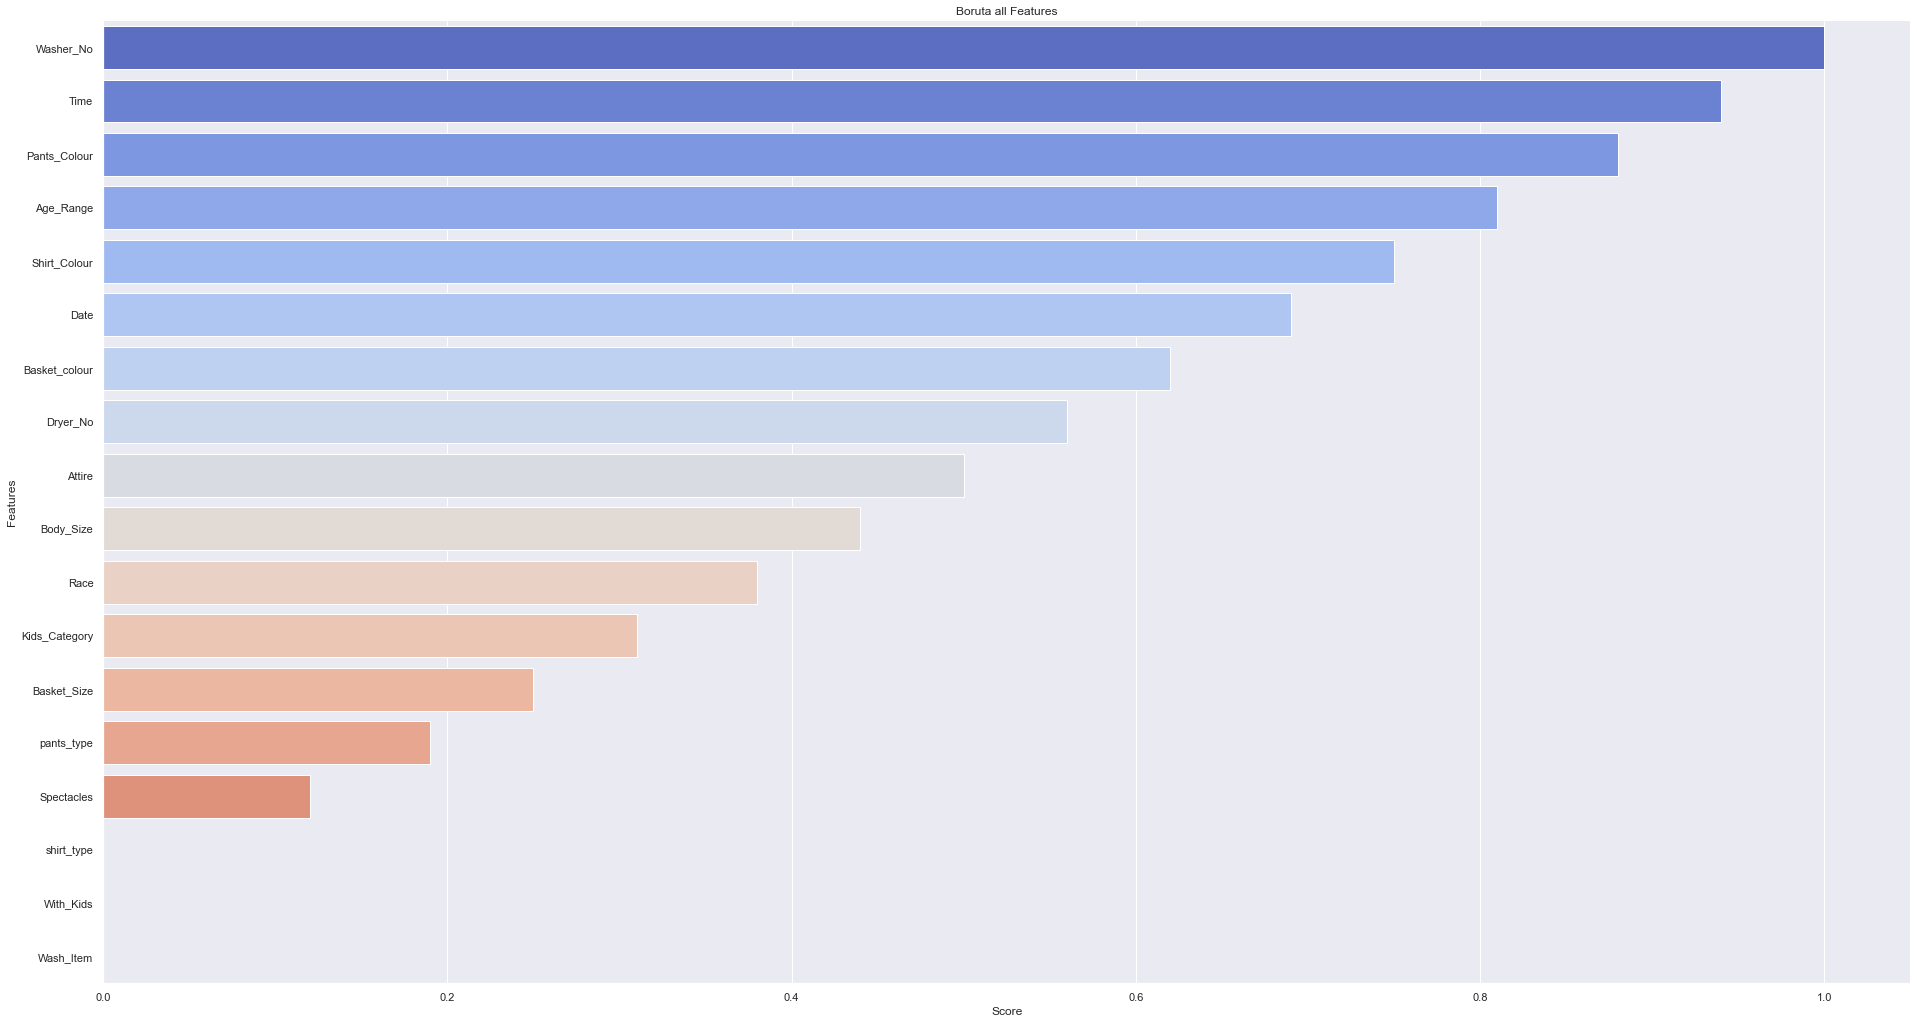

In [ ]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:30], kind = "bar", height=14, aspect=1.9, palette='coolwarm')
plt.title('Boruta all Features')

### Recursive Feature Elimination (RFE)

In [ ]:
rf = RandomForestClassifier(max_depth=5, n_estimators=100)
rf.fit(X,y)
rfe = RFECV(rf, min_features_to_select=1, cv=2)
rfe.fit(X,y)

RFECV(cv=2, estimator=RandomForestClassifier(max_depth=5))

In [ ]:
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)

print('---------Top RFE Score----------')
display(rfe_score)

---------Top RFE Score----------


,Features,Score
15,Washer_No,1.00
1,Time,0.94
12,Pants_Colour,0.88
8,Basket_colour,0.82
10,Shirt_Colour,0.76
4,Age_Range,0.71
0,Date,0.65
16,Dryer_No,0.59
3,Body_Size,0.53
6,Kids_Category,0.47


Text(0.5, 1.0, 'RFE Top Features')

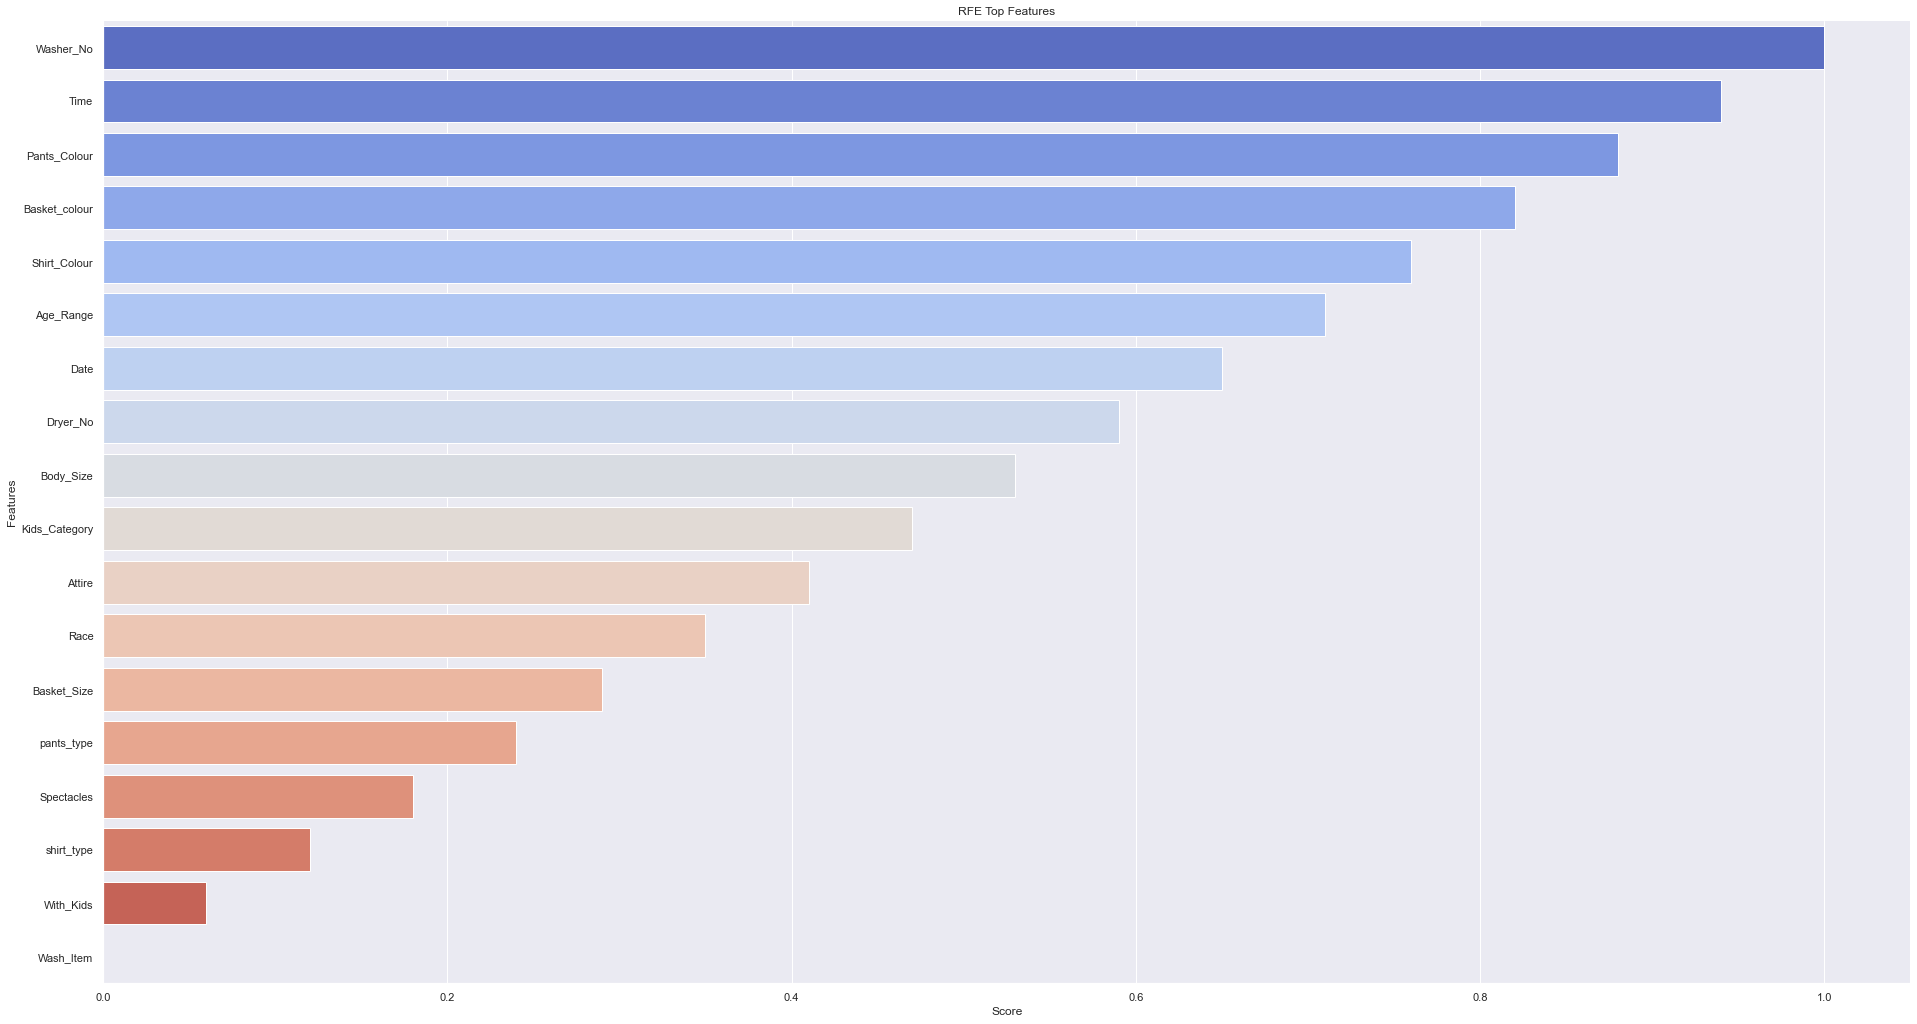

In [ ]:
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[0:21], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("RFE Top Features")

### Classification Models

### Question: What classification model is suitable to classify the gender of the customer from the dataset?

In [ ]:
y = df1['Gender'] 
X = df1[['Washer_No','Pants_Colour','Time']]

In [ ]:
knn_model = KNeighborsClassifier()
rfc_model = RandomForestClassifier()
dtc_model = DecisionTreeClassifier()

model_names = ['KNN','Random Forest Classifier','Decision Tree Classifier'] 
model_dic = [knn_model,rfc_model,dtc_model] 
cv_score_list = [] 

# Cross Validation Score of Models
for model in model_dic:
    scores = cross_val_score(model,X,y,cv=12) #
    cv_score_list.append(scores)

df_score = pd.DataFrame(cv_score_list,index=model_names)
df_score

,0,1,2,3,4,5,6,7,8,9,10,11
KNN,0.573529,0.397059,0.529412,0.507463,0.507463,0.417910,0.492537,0.328358,0.447761,0.537313,0.492537,0.641791
Random Forest Classifier,0.470588,0.455882,0.485294,0.477612,0.552239,0.447761,0.507463,0.462687,0.477612,0.597015,0.701493,0.791045
Decision Tree Classifier,0.529412,0.455882,0.544118,0.417910,0.567164,0.507463,0.522388,0.477612,0.597015,0.597015,0.597015,0.791045


In [ ]:
pre_y_list = [] 

# K-fold Cross Validation
kf = KFold(n_splits=12, random_state=None)
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

# Trian Models
for model in model_dic:
    pre_y_list.append(model.fit(X_train,y_train).predict(X_test))

# Evaluate Models
model_metrics_name = [accuracy_score, precision_score, recall_score, f1_score]
model_metrics_list = []
for pre_y in pre_y_list:
    tmp_list = []
    for mdl in model_metrics_name:
        tmp_score = mdl(y_test, pre_y)
        tmp_list.append(tmp_score)
    model_metrics_list.append(tmp_list)
df_metrics = pd.DataFrame(model_metrics_list,index=model_names,columns=['accuracy','precision','recall','f1'])

# Calculate AUC
auc_list = []
fpr_list = []
tpr_list = []
for model in model_dic:
    y_score = model.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_test,y_score)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_score = auc(fpr,tpr)
    auc_list.append(auc_score)
df_metrics['auc'] = auc_list
df_metrics

,accuracy,precision,recall,f1,auc
KNN,0.507463,0.456522,0.724138,0.560000,0.662886
Random Forest Classifier,0.791045,0.777778,0.724138,0.750000,0.882486
Decision Tree Classifier,0.835821,0.821429,0.793103,0.807018,0.879764


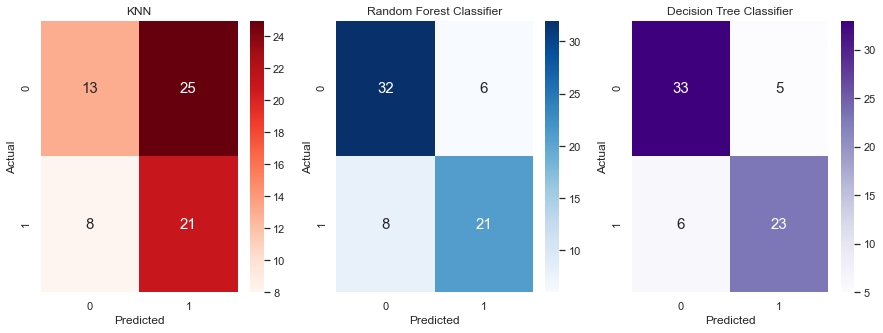

In [ ]:
# Confusion Matrix
# TN FP
# FN TP
sns.set(rc={'figure.figsize':(15,5)})
confusion_matrix_list = []
for pre_y in pre_y_list:
    confusion_matrix = pd.crosstab(y_test,  pre_y, rownames=['Actual'], colnames=['Predicted'])
    confusion_matrix_list.append(confusion_matrix)
    
f,(ax1,ax2,ax3) = plt.subplots(1,3) 
ax1.get_shared_y_axes().join(ax2)
g1 = sns.heatmap(confusion_matrix_list[0],annot=True,cmap="Reds",annot_kws={'size': 15},ax=ax1).set(title='KNN')
g2 = sns.heatmap(confusion_matrix_list[1],annot=True,cmap="Blues",annot_kws={'size': 15},ax=ax2).set(title='Random Forest Classifier')
g3 = sns.heatmap(confusion_matrix_list[2],annot=True,cmap="Purples",annot_kws={'size': 15},ax=ax3).set(title='Decision Tree Classifier')

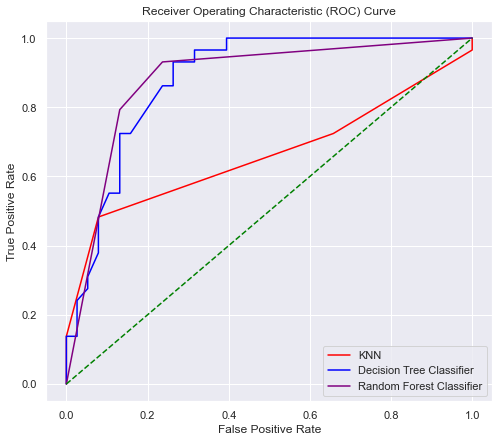

In [ ]:
# ROC Curve
plt.figure(figsize=(8,7))

plt.plot(fpr_list[0], tpr_list[0], color='red', label='KNN')
plt.plot(fpr_list[1], tpr_list[1], color='blue', label='Decision Tree Classifier')
plt.plot(fpr_list[2], tpr_list[2], color='purple', label='Random Forest Classifier')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

### Regression Models

### Question: What regression model is suitable to predict the gender of the customer from the dataset?

In [ ]:
y = df1['Gender']
X = df1[['Washer_No','Pants_Colour','Time']]

In [ ]:
lr_model = LinearRegression()
gbr_model = GradientBoostingRegressor()
rf_model = RandomForestRegressor()
dt_model = DecisionTreeRegressor()

model_names = ['Linear Regression','GBR','Random Forest Regressor','Decision Tree Regressor'] 
model_dic = [lr_model,gbr_model,rf_model,dt_model] 
cv_score_list = []

# check the cross validation score of models
for model in model_dic:
    scores = cross_val_score(model,X,y,cv=12) #
    cv_score_list.append(scores)

df_score = pd.DataFrame(cv_score_list,index=model_names)
df_score

,0,1,2,3,4,5,6,7,8,9,10,11
Linear Regression,-0.010886,-0.046830,-0.050364,-0.051041,-0.081676,-0.092751,-0.019154,-0.003899,-0.040867,0.052417,0.026990,0.049570
GBR,-0.072384,-0.356626,-0.206803,-0.011920,-0.019400,-0.164932,-0.246731,-0.086817,0.102622,0.014209,0.264999,0.226744
Random Forest Regressor,-0.157824,-0.507553,-0.351093,-0.469130,-0.321031,-0.373740,-0.431533,-0.433338,0.095338,-0.156256,0.213628,0.434627
Decision Tree Regressor,-0.829861,-0.838235,-1.042457,-1.333036,-0.891510,-1.278377,-1.172973,-1.161290,-0.403810,-0.681004,-0.094374,0.452813


In [ ]:
pre_y_list = [] #list to store predicted y value

# K-fold Cross Validation
kf = KFold(n_splits=12, random_state=None)
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

# Train Models
for model in model_dic:
    pre_y_list.append(model.fit(X_train,y_train).predict(X_test))

# Evaluate Models
model_metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error,r2_score]
model_metrics_list = []
for pre_y in pre_y_list:
    tmp_list = []
    for mdl in model_metrics_name:
        tmp_score = mdl(y_test, pre_y)
        tmp_list.append(tmp_score)
    model_metrics_list.append(tmp_list)
df_met = pd.DataFrame(model_metrics_list,index=model_names,columns=['ev','mae','mse','r2'])
df_met

,ev,mae,mse,r2
Linear Regression,0.069619,0.481157,0.233320,0.049570
GBR,0.227250,0.391767,0.189719,0.227179
Random Forest Regressor,0.434880,0.263055,0.138989,0.433828
Decision Tree Regressor,0.460980,0.164179,0.134328,0.452813


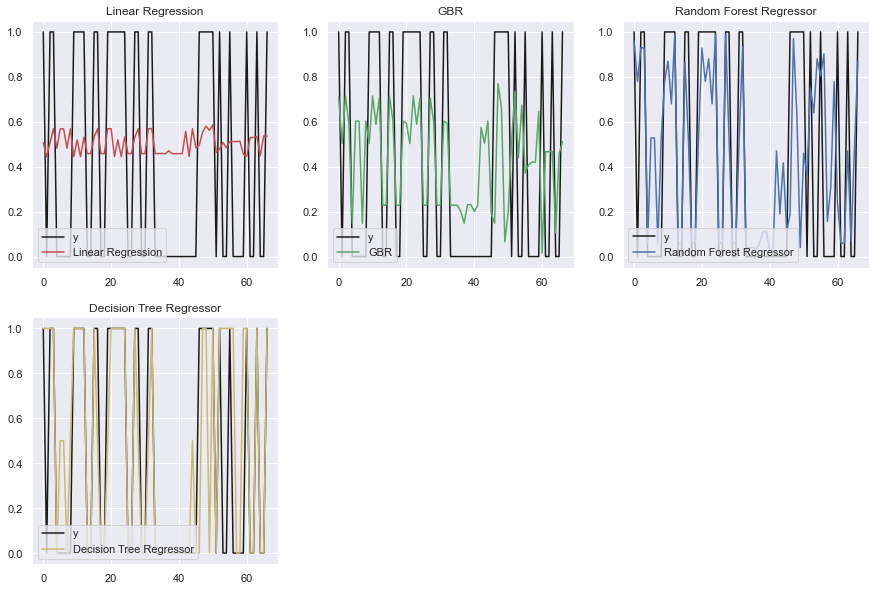

In [ ]:
# Compared Predicted Data
plt.figure(figsize=(15,10))
x_ax = range(len(y_test))
color_list = ['r','g','b','y']
for i, pre_y in enumerate(pre_y_list):
    plt.subplot(2,3,i+1)
    plt.plot(x_ax,y_test,color='k',label='y')
    plt.plot(x_ax,pre_y,color_list[i], label=model_names[i])
    plt.title(model_names[i])
    plt.legend(loc='lower left')
plt.show()

### Association Rule

Question: Which dryer is often used after the customer uses the washer?

Change the data type of series to string and check the data shape

In [ ]:
df['Washer_No'] = df.Washer_No.astype(str)
df['Dryer_No'] = df.Dryer_No.astype(str)
df_AR = df[['Washer_No','Dryer_No']]
df_AR.shape

(807, 2)

# Data Preparation

The Apriori package we'll be using expects our dataset to be in the form of a list of lists, with the entire dataset being a large list and each transaction being an inner list within the outer big list. For the time being, we have data in the form of a pandas dataframe. Execute the following script to transform our pandas dataframe into a list of lists:

In [ ]:
records = []
for i in range(0, 807):
    records.append([str(df_AR.values[i,j]) for j in range(0, 2)])

# apply apriori algorithm with support = 0.1%, confidence =30%, lift = 0.5
association_rules = apriori(records, min_support=0.1, min_confidence=0.3, min_lift=0.5, min_length=2)
association_results = list(association_rules)

# chech the len
len(association_results)

1

In [ ]:
# print the results for the item
print(association_results)

[RelationRecord(items=frozenset({'7', '3'}), support=0.11152416356877323, ordered_statistics=[OrderedStatistic(items_base=frozenset({'3'}), items_add=frozenset({'7'}), confidence=0.3947368421052631, lift=1.3671786763044949), OrderedStatistic(items_base=frozenset({'7'}), items_add=frozenset({'3'}), confidence=0.38626609442060084, lift=1.3671786763044949)])]


In [ ]:
cnt =0

for item in association_results:
    cnt += 1
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("(Rule " + str(cnt) + ") " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(round(item[1],3)))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(round(item[2][0][2],4)))
    print("Lift: " + str(round(item[2][0][3],4)))
    print("=====================================")

(Rule 1) 7 -> 3
Support: 0.112
Confidence: 0.3947
Lift: 1.3672


### Clustering technique

In [ ]:
df['datetime'] = pd.to_datetime(df["Time"])
df['hour'] = df['datetime'].dt.hour
df.head()

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,datetime,hour
0,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,...,blue,short_sleeve,black,short,clothes,3,10,no,2021-10-31 20:17:50,20
1,19/10/2015,20:28:42,indian,male,thin,32.0,no,no_kids,big,green,...,white,short_sleeve,blue_jeans,long,clothes,6,9,no,2021-10-31 20:28:42,20
2,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,...,red,short_sleeve,black,long,clothes,4,10,no,2021-10-31 20:58:31,20
3,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,big,black,...,black,short_sleeve,yellow,short,clothes,5,9,no,2021-10-31 21:31:28,21
4,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,...,blue,short_sleeve,white,long,clothes,3,9,no,2021-10-31 21:40:28,21


In [ ]:
df2 = df.copy()
le = LabelEncoder()
for col in df2.columns:
  if col != "Age_Range":
    if df2[col].dtypes == object:
        df2[col] = le.fit_transform(df2[col])

In [ ]:
df2

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,datetime,hour
0,7,283,3,1,1,28.0,1,3,0,8,...,1,1,0,1,1,0,0,0,2021-10-31 20:17:50,20
1,7,288,2,1,2,32.0,0,1,0,3,...,9,1,2,0,1,3,3,0,2021-10-31 20:28:42,20
2,7,307,3,0,1,30.0,0,1,0,1,...,8,1,0,0,1,1,0,0,2021-10-31 20:58:31,20
3,7,331,2,1,2,51.0,0,1,0,0,...,0,1,11,1,1,2,3,0,2021-10-31 21:31:28,21
4,7,336,2,1,1,34.0,0,1,0,1,...,1,1,10,0,1,0,3,0,2021-10-31 21:40:28,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,5,272,3,0,1,45.0,0,1,1,9,...,8,0,0,0,1,0,0,0,2021-10-31 20:05:46,20
803,5,292,3,1,0,34.0,0,1,0,4,...,9,1,0,0,0,0,1,0,2021-10-31 20:33:01,20
804,5,293,3,0,1,53.0,0,1,0,7,...,6,0,7,0,1,0,1,1,2021-10-31 20:37:01,20
805,5,296,2,0,1,37.0,0,1,0,3,...,2,1,0,0,1,3,0,0,2021-10-31 20:42:57,20


In [ ]:
X = df2.drop(['hour','Date','datetime','Time'], axis=1)
y = df2['hour']

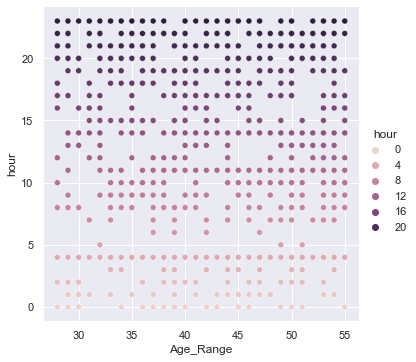

In [ ]:
ax = sns.relplot(x="Age_Range", y="hour", hue="hour", data=df2)

In [ ]:
# the number of clusters here is 2

# Your codes here...
km = KMeans(n_clusters = 2, random_state=1)
km.fit(X)

KMeans(n_clusters=2, random_state=1)

In [ ]:
km.labels_

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,

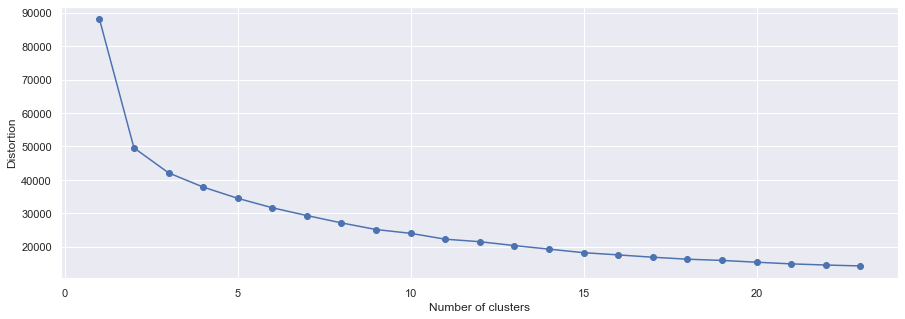

In [ ]:
distortions = []

for i in range(1,24):
  km = KMeans(
      n_clusters=i, init='random',
      n_init=10, max_iter=300,
      tol=1e-04, random_state=0
  )
  km.fit(X)
  distortions.append(km.inertia_)

# plot
plt.plot(range(1, 24), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
df_new = df2.copy()
df_new = df_new.drop("hour", axis=1)
df_new['hour']=km.labels_

<AxesSubplot:xlabel='Age_Range', ylabel='hour'>

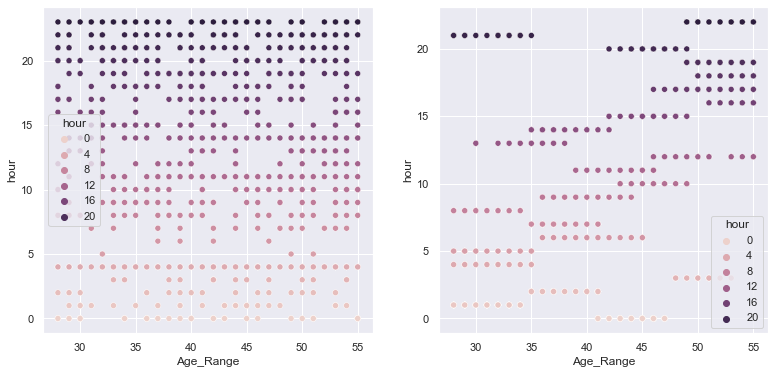

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13,6))

sns.scatterplot(x="Age_Range", y="hour", hue="hour", data=df, ax=axes[0])
sns.scatterplot(x="Age_Range", y="hour", hue="hour", data=df_new, ax=axes[1])